# CFD Assignment

## Abhishek Raj - 16AE30020

## Importing Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Function for initial condition

In [2]:
def initial_conditions(xmax, N, T):
    #intialize NxT matrix
    u = np.zeros((N, T)) #N->space grid; T->time grid
    
    #divide 2pi into N grids
    x = np.linspace(0.0, xmax, N)
    
    #Initial condition: u(x, 0) = sin(x)
    u[:, 0] = np.sin(x)
    
    return u, x

## Function for Forward Time Backward Space (FTBS) convection equation

In [3]:
#sigma = c*(Δt/Δx)

def upwind_convection(sigma, N, tmax, c):
    xmax = 2*math.pi #xmax = 2pi
    h = xmax/(N-1) #Δx
    dt = (h/c)*sigma #Δt
    T = int(tmax/dt + 1) #number of grids in time
    
    print('xmax = '+str(xmax))
    print('tmax = '+str(tmax))
    print('Number of grids in space = '+str(N))
    print('Number of grids in time = '+str(T))
    print('Δx = '+str(h))
    print('Δt = '+str(dt))
    print('sigma = '+str(sigma))
    
    #initial conditions
    u, x = initial_conditions(xmax, N, T)
    
    i = 1
    for n in range(0, T-1):
        u[0, n+1] = u[0, n] + sigma*(u[0, n] - u[1, n])
        u[i:N-1, n+1] = u[i:N-1, n] - sigma*(u[i:N-1, n] - u[i-1:N-2, n])
    return u, x, T, dt

## Plotting u(x,0), u(x,T-1) and exact solution

In [4]:
def plot(u, x, N, T, dt, c):
    plt.figure()
    ax = plt.subplot(111)
    colour = iter(cm.rainbow(np.linspace(0, 100, T)))
    ax.plot(x, u[:,0], linestyle = '-', c = 'b', label = 'n='+str(0))
    ax.plot(x, u[:, T-1], linestyle = '-', c = 'r', label = 'n='+str(T - 1))
    ax.plot(x, np.sin(x - c*(T-1)*dt), linestyle = '--', c = 'g', label = 'exact solution')
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*2, box.height*2])
    ax.legend(bbox_to_anchor = (1.02, 1), loc = 2)
    
    plt.ylim([-1.5, 1.5])
    plt.xlim([0.0, 2*math.pi])
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.show()

## Driver Function

In [5]:
#u, x, T = upwind_convection(sigma, N, tmax, c)
u, x, T, dt = upwind_convection(0.5, 501, 1.0, 1.0)

xmax = 6.283185307179586
tmax = 1.0
Number of grids in space = 501
Number of grids in time = 160
Δx = 0.012566370614359173
Δt = 0.006283185307179587
sigma = 0.5


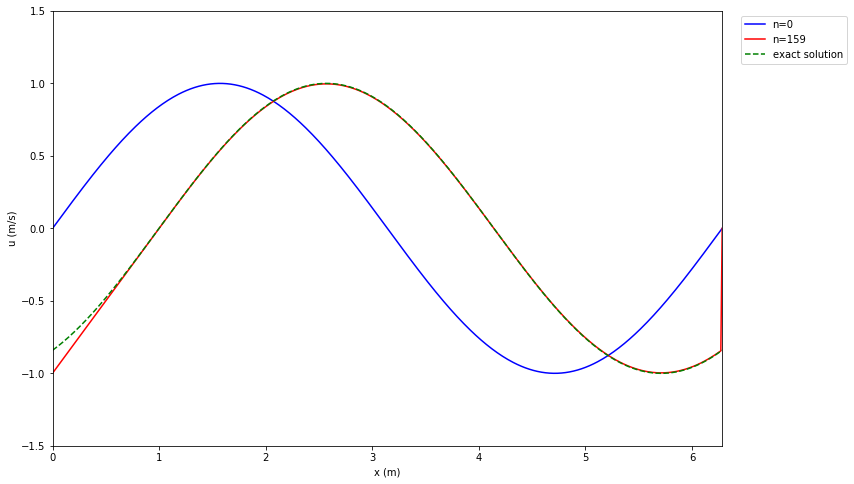

In [6]:
#plot(u, x, N, T, Δt, c)
plot(u, x, 501, T, dt, 1.0)

In [7]:
u

array([[ 0.00000000e+00, -6.28301994e-03, -1.25660399e-02, ...,
        -9.86434131e-01, -9.92717151e-01, -9.99000171e-01],
       [ 1.25660399e-02,  6.28301994e-03,  0.00000000e+00, ...,
        -9.73868091e-01, -9.80151111e-01, -9.86434131e-01],
       [ 2.51300954e-02,  1.88480677e-02,  1.25655438e-02, ...,
        -9.61302051e-01, -9.67585071e-01, -9.73868091e-01],
       ...,
       [-2.51300954e-02, -3.14101391e-02, -3.76886947e-02, ...,
        -8.45054984e-01, -8.48344522e-01, -8.51600438e-01],
       [-1.25660399e-02, -1.88480677e-02, -2.51291034e-02, ...,
        -8.38342465e-01, -8.41698725e-01, -8.45021623e-01],
       [-2.44929360e-16,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])